In [183]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [184]:
# Load the provided CSV file
file_path = r"C:\\Users\\Ericm\\PycharmProjects\\wageData\\.venv\\Scripts\\SDCountyEmployee_data_cleaned_adjusted.csv"
df = pd.read_csv(file_path, encoding='latin1')

df

,Year,EmployerName,DepartmentOrSubdivision,Position,MinPositionSalary,MaxPositionSalary,ReportedBaseWage,RegularPay,OvertimePay,LumpSumPay,OtherPay,TotalWages,DefinedBenefitPlanContribution,EmployeesRetirementCostCovered,DeferredCompensationPlan,HealthDentalVision,TotalRetirementAndHealthContribution,PensionFormula
0,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,56247.0,NaN,NaN,NaN,NaN,56247.000000,NaN,2197.0,NaN,4164.000000,6361.000000,3@60
1,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,65839.0,NaN,NaN,NaN,NaN,65839.000000,NaN,2278.0,NaN,4164.000000,6442.000000,3@60
2,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,67338.0,NaN,NaN,NaN,NaN,67338.000000,NaN,4889.0,NaN,8868.000000,13757.000000,3@60
3,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,66206.0,NaN,NaN,NaN,NaN,66206.000000,NaN,4889.0,NaN,8868.000000,13757.000000,3@60
4,2009,San Diego,Air Pollution Control Dep,Asst APC Engineer,59800.000000,72675.000000,63634.0,NaN,NaN,NaN,NaN,63634.000000,NaN,2221.0,NaN,4164.000000,6385.000000,3@60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153239,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,31284.738929,13150.250241,1322.981218,3388.071112,49146.041500,4683.592901,NaN,NaN,2612.166215,7295.759115,2.7% @ 57
153240,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,23877.029832,711.128808,1750.362590,3022.649477,29361.170708,3491.572038,NaN,NaN,2168.590820,5660.162857,2.7% @ 57
153241,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,31284.738929,15075.930726,1322.981218,3388.071112,51071.721984,4683.592901,NaN,NaN,2612.166215,7295.759115,2.7% @ 57
153242,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,2693.136327,897.712109,215.450906,NaN,3806.299342,373.870690,NaN,NaN,650.577246,1024.447936,2.7% @ 57


In [185]:
# Define the keywords for positions to include and exclude
include_keywords = {}
include_keywords['Police'] = ['Police Officer', 'Police Detective', 'Police Agent', 'Police Corporal',
                    'Police Sergeant', 'Police Lieutenant', 'Police Captain', 'Police Chief', 'Chief of Police']
include_keywords['Engineer'] = ['Engineer']
include_keywords['Fire'] = ['Firefighter', 'Fire Fighter', 'Fire  Chief', 'Fire Marshal', 'Fire Division Chief', 'Fire Battalion Chief', 'Fire Battalion  Chief', 'Fire  Chief', 'Fire Bat Chief']

exclude_keywords = {}
exclude_keywords['Police'] = ['Assistant', 'Secretary', 'Assist', 'Asst', 'Trainee', 'tied', 'Reserve', 'Temp', 'Security', 'terminal', 'Terminal']
exclude_keywords['Engineer'] = ['Assistant', 'Assist', 'Asst', 'Student', 'Battalion']
exclude_keywords['Fire'] = ['Assistant', 'Assist', 'Asst', 'Volunteer', 'Student']

position = 'Police'

# Filter for positions that contain one of the include keywords
#include_filter = df['Position'].str.contains('|'.join(include_keywords[position]), case=False, na=False)

# Exclude positions containing the exclude keywords
exclude_filter = ~df['Position'].str.contains('|'.join(exclude_keywords[position]), case=False, na=False)

# Apply both filters
filtered_df = df[include_filter & exclude_filter]

filtered_df.to_csv(f"C:/Users/Ericm\PycharmProjects\wageData\.venv\Scripts/{position}WageDataAdjusted.csv")

filtered_df

,Year,EmployerName,DepartmentOrSubdivision,Position,MinPositionSalary,MaxPositionSalary,ReportedBaseWage,RegularPay,OvertimePay,LumpSumPay,OtherPay,TotalWages,DefinedBenefitPlanContribution,EmployeesRetirementCostCovered,DeferredCompensationPlan,HealthDentalVision,TotalRetirementAndHealthContribution,PensionFormula
9946,2012,San Diego,Public Safety Group,Volunteer Fire Fighter,NaN,NaN,NaN,88.769807,NaN,NaN,NaN,88.769807,NaN,NaN,NaN,NaN,NaN,NaN
9947,2012,San Diego,Public Safety Group,Volunteer Fire Fighter,NaN,NaN,NaN,621.388647,NaN,NaN,NaN,621.388647,NaN,NaN,NaN,NaN,NaN,NaN
9948,2012,San Diego,Public Safety Group,Volunteer Fire Fighter,NaN,NaN,NaN,2997.616209,NaN,NaN,NaN,2997.616209,NaN,NaN,NaN,NaN,NaN,NaN
9949,2012,San Diego,Public Safety Group,Volunteer Fire Fighter,NaN,NaN,NaN,710.158454,NaN,NaN,NaN,710.158454,NaN,NaN,NaN,NaN,NaN,NaN
9950,2012,San Diego,Public Safety Group,Volunteer Fire Fighter,NaN,NaN,NaN,1110.089793,NaN,NaN,NaN,1110.089793,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153238,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,39894.326119,17169.184137,1610.953180,2088.324796,60762.788232,5696.071342,NaN,NaN,3388.071112,9084.142454,2.7% @ 57
153239,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,31284.738929,13150.250241,1322.981218,3388.071112,49146.041500,4683.592901,NaN,NaN,2612.166215,7295.759115,2.7% @ 57
153240,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,23877.029832,711.128808,1750.362590,3022.649477,29361.170708,3491.572038,NaN,NaN,2168.590820,5660.162857,2.7% @ 57
153241,2023,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",64195.920972,78060.820461,NaN,31284.738929,15075.930726,1322.981218,3388.071112,51071.721984,4683.592901,NaN,NaN,2612.166215,7295.759115,2.7% @ 57


In [186]:
filtered_df['Position'].unique()

array(['Volunteer Fire Fighter', 'Volunteer Firefighter',
       'Fire Battalion  Chief', 'Fire Division Chief',
       'Paramedic Firefighter', 'Fire Marshal',
       'Fire Battalion Chief (112 Hr)', 'Fire Battalion Chief (80 Hr)',
       'Firefighter (112 Hr)', 'Firefighter (80 Hr)', 'Fire Fighter',
       'Fire Fighter - Paramedic', 'Firefighter', 'Firefighter/Paramedic',
       'Student Firefighter/Paramedic', 'Fire Battalion Chief',
       'Paramedic/Firefighter', 'Building Officer/Fire Marshall',
       'Contract Deputy Fire Marshal I', 'Deputy Fire Marshal II',
       'Firefighter I', 'Firefighter/Paramedic I',
       'Firefighter/Paramedic III', 'Probationary Firefighter/Paramedic',
       'Senior Deputy Fire Marshal', 'Dep Fire Marshall',
       'Firefighter w/ PM Bonus', 'Deputy Fire Marshal',
       'Fire Battalion Chief (40 Hour)', 'Fire Battalion Chief (56 Hour)',
       'Firefighter Paramedic (56 Hour)', 'Fire Fighter I',
       'Fire Fighter II', 'Firefighter/Paramedic (

In [187]:
grouped_filtered_df = filtered_df.groupby(['Year', 'EmployerName']).agg(
    PositionCount=('Position', 'size'),
    MeanTotalWages=('TotalWages', 'mean')
).reset_index()

grouped_filtered_df.columns = ['Year', 'City', 'NumEmpls', 'MeanTotWage']
grouped_filtered_df

,Year,City,NumEmpls,MeanTotWage
0,2009,Carlsbad,40,100473.775000
1,2009,Chula Vista,48,95151.895833
2,2009,Coronado,16,79952.187500
3,2009,Del Mar,11,31666.181818
4,2009,El Cajon,39,89097.564103
...,...,...,...,...
264,2023,San Diego,537,76964.400840
265,2023,San Marcos,35,90121.766209
266,2023,Santee,35,80018.305603
267,2023,Solana Beach,7,93694.187658


In [188]:

grouped_filtered_df['NumEmpls%Chg'] = grouped_filtered_df.groupby(['City'])['NumEmpls'].pct_change()
grouped_filtered_df['MeanTotWage%Chg'] = grouped_filtered_df.groupby(['City'])['MeanTotWage'].pct_change()

#grouped_filtered_df.to_csv(f"C:/Users/Ericm\PycharmProjects\wageData\.venv\Scripts/{position}_RoC.csv")

grouped_filtered_df

,Year,City,NumEmpls,MeanTotWage,NumEmpls%Chg,MeanTotWage%Chg
0,2009,Carlsbad,40,100473.775000,NaN,NaN
1,2009,Chula Vista,48,95151.895833,NaN,NaN
2,2009,Coronado,16,79952.187500,NaN,NaN
3,2009,Del Mar,11,31666.181818,NaN,NaN
4,2009,El Cajon,39,89097.564103,NaN,NaN
...,...,...,...,...,...,...
264,2023,San Diego,537,76964.400840,-0.003711,0.045357
265,2023,San Marcos,35,90121.766209,0.000000,-0.037241
266,2023,Santee,35,80018.305603,-0.054054,0.099156
267,2023,Solana Beach,7,93694.187658,0.400000,-0.060315


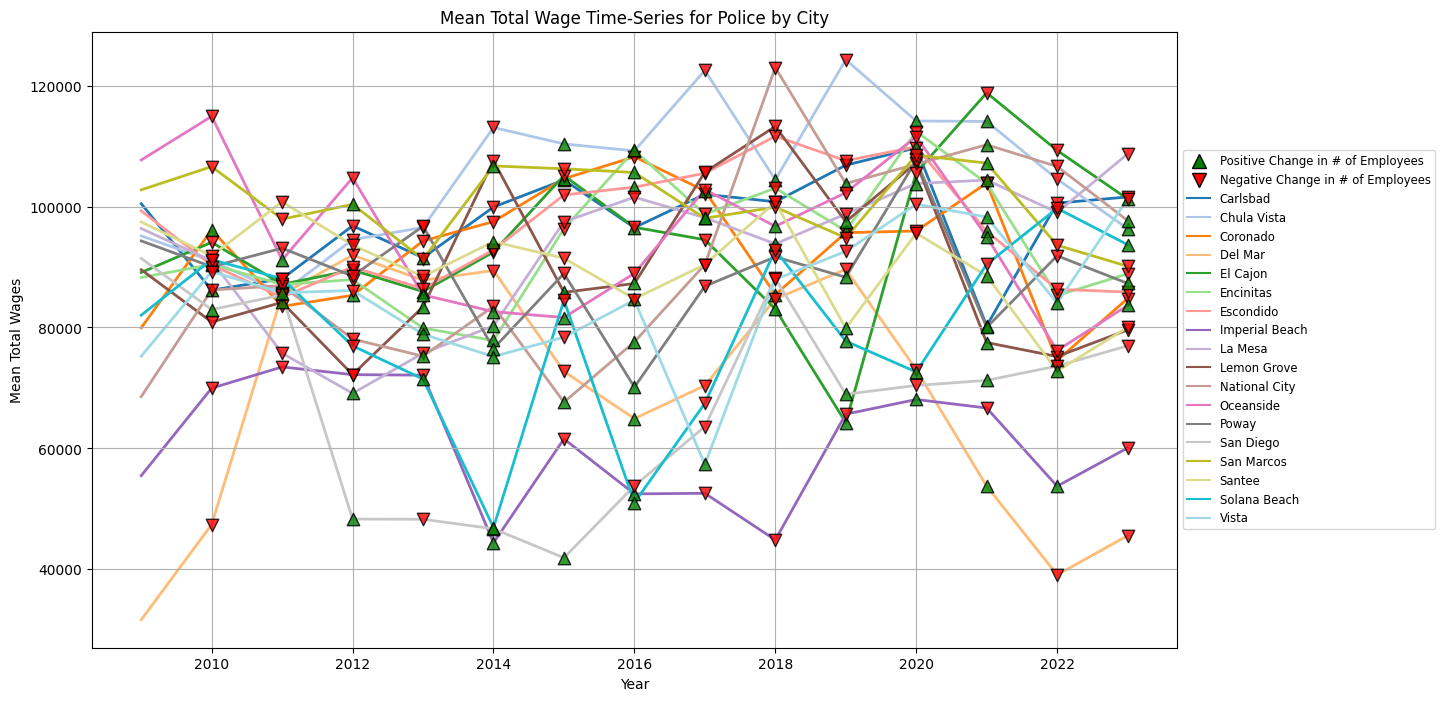

In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# If position is not null, filter for that position only
def plot_wage_timeseries(df, position, filter, save_path=None):
    # Convert columns to appropriate types
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df['NumEmpls%Chg'] = pd.to_numeric(df['NumEmpls%Chg'], errors='coerce')
    df['MeanTotWage'] = pd.to_numeric(df['MeanTotWage'], errors='coerce')
    
    # Filter by position if provided
    if filter:
        df = df[df['Position'] == filter]
    
    # Get a list of cities in the dataset
    cities = df['City'].unique()
    
    # Use a distinct color map that can generate unique colors for each city
    num_cities = len(cities)
    cmap = plt.get_cmap('tab20', num_cities)  # 'tab20' is good for categorical data with many distinct colors
    
    # Plotting
    plt.figure(figsize=(14, 8))

    city_colors = {}

    for i, city in enumerate(cities):
        city_data = df[df['City'] == city]
        
        # Separate the data into positive and negative employee change
        positive_change = city_data[city_data['NumEmpls%Chg'] > 0]
        negative_change = city_data[city_data['NumEmpls%Chg'] <= 0]
        
        # Assign and store a unique color for each city from the colormap
        color = cmap(i)
        city_colors[city] = color
        
        # Plot time-series for the city without markers on the line
        plt.plot(city_data['Year'], city_data['MeanTotWage'], label=city, color=color, linestyle='-', linewidth=2, zorder=1)
        
        # Overlay smaller markers for positive and negative employee changes with higher zorder
        plt.scatter(positive_change['Year'], positive_change['MeanTotWage'], 
                    color='green', marker='^', s=80, edgecolor='black', alpha=0.8, zorder=2)
        plt.scatter(negative_change['Year'], negative_change['MeanTotWage'], 
                    color='red', marker='v', s=80, edgecolor='black', alpha=0.8, zorder=2)
    
    plt.title(f'Mean Total Wage Time-Series for {position} by City')
    plt.xlabel('Year')
    plt.ylabel('Mean Total Wages')
    
    # Create custom handles for the legend to only show one instance of the markers
    custom_handles = [
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Positive Change in # of Employees', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='red', markersize=10, label='Negative Change in # of Employees', markeredgecolor='black')
    ]
    
    # Add city-specific handles with unique colors
    city_handles = [plt.Line2D([0], [0], color=city_colors[city], label=city) for city in cities]
    
    plt.legend(handles=custom_handles + city_handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    
    plt.grid(True)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')  # Use bbox_inches='tight' to avoid cutting off the legend
        
    plt.show()

# Example usage with your DataFrame
plot_wage_timeseries(grouped_filtered_df, position=position, filter = None, save_path=f"C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts/{position}WagesNumEmployeesViz.pdf")

In [190]:
import pandas as pd
import statsmodels.api as sm

# Convert 'City' to numeric codes if necessary
grouped_filtered_df['City'] = grouped_filtered_df['City'].astype('category').cat.codes
grouped_filtered_df['Year'] = pd.to_numeric(grouped_filtered_df['Year'])

# Create a lagged variable for NumEmpls%Chg by shifting it by 1 year within each city
#grouped_filtered_df['MeanTotWage%Chg_Lagged'] = grouped_filtered_df.groupby('City')['NumEmpls%Chg'].shift(1)

# Define the dependent variable
y = pd.to_numeric(grouped_filtered_df['MeanTotWage%Chg'], errors='coerce')

# Define the independent variables, including the lagged NumEmpls%Chg
X = grouped_filtered_df[['City', 'Year', 'NumEmpls%Chg']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Drop missing values that resulted from the lagging operation
X = X.dropna()
y = y[X.index]

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        MeanTotWage%Chg   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     52.07
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           4.09e-26
Time:                        15:12:37   Log-Likelihood:                 152.25
No. Observations:                 251   AIC:                            -296.5
Df Residuals:                     247   BIC:                            -282.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0642      4.199      0.492   